In [7]:
import numpy as np
import matplotlib.pyplot as plt
import mcnptools   ### need to install mcnptools package!
from mcnptools import Mctal, MctalTally

try:
    plt.style.use('~/Desktop/nuctools/nuctools/candidacy.mplstyle')
except:
    pass
try:
    %matplotlib ipympl
except:
    pass

In [ ]:
txt = '''1.000E-07 68 70
1.120E-07 8 9
1.260E-07 9 10
1.410E-07 10 11
1.590E-07 12 12
1.780E-07 13 14
2.000E-07 15 15
2.240E-07 17 17
2.510E-07 19 19
2.820E-07 21 22
3.160E-07 23 24
3.550E-07 26 27
3.980E-07 30 30
4.470E-07 33 34
5.010E-07 37 38
5.620E-07 42 43
6.310E-07 47 48
7.080E-07 53 54
7.940E-07 59 61
8.910E-07 66 68
1.000E-06 94 102
1.120E-06 108 117
1.260E-06 121 131
1.410E-06 136 147
1.590E-06 152 165
1.780E-06 171 185
2.000E-06 233 242
2.240E-06 266 276
2.510E-06 299 310
2.820E-06 351 360
3.160E-06 422 426
3.550E-06 473 478
3.980E-06 559 538
4.470E-06 631 605
5.010E-06 732 739
5.620E-06 834 863
6.310E-06 959 1023
7.080E-06 1125 1094
7.940E-06 1271 1238
8.910E-06 1440 1480
1.000E-05 1586 1582
1.120E-05 1751 1806
1.260E-05 2031 2028
1.410E-05 2237 2216
1.590E-05 2534 2510
1.780E-05 2723 2760
2.000E-05 3046 3076
2.240E-05 3402 3357
2.510E-05 3795 3717
2.820E-05 4090 4042
3.160E-05 4413 4536
3.550E-05 4946 4843
3.980E-05 5287 5346
4.470E-05 5739 5768
5.010E-05 6269 6102
5.620E-05 6769 6643
6.310E-05 7101 7028
7.080E-05 7792 7099
7.940E-05 8387 7177
8.910E-05 9065 6804
1.000E-04 9479 6143
1.120E-04 10384 5072
1.260E-04 11190 3880
1.410E-04 12110 2978
1.590E-04 13207 2275
1.780E-04 14222 2008
2.000E-04 15659 1670
2.240E-04 17084 1438
2.510E-04 18596 1323
2.820E-04 20200 1243
3.160E-04 22267 1154
3.550E-04 24353 1122
3.980E-04 26240 1093
4.470E-04 28126 1100
5.010E-04 29851 1185
5.620E-04 31766 1174
6.310E-04 33515 1153
7.080E-04 35145 1199
7.940E-04 36309 1240
8.910E-04 37229 1200
1.000E-03 37053 1193
1.120E-03 37068 1170
1.260E-03 36018 1098
1.410E-03 34461 1090
1.590E-03 32322 984
1.780E-03 29910 962
2.000E-03 26820 858
2.240E-03 23566 686
2.510E-03 19622 581
2.820E-03 16132 482
3.160E-03 12651 420
3.550E-03 9748 338
3.980E-03 6709 257
4.470E-03 4595 190
5.010E-03 2985 150
5.620E-03 1802 115
6.310E-03 1051 88
7.080E-03 604 77
'''

data = np.fromstring(txt, sep=' ')
data.shape = -1, 3

exp_t = data[:,0]
exp_data = data[:,1]
exp_data_cd = data[:,2]

# Benchmark normalization
norm_min = 47
norm_max = 60

# Above Cd normalization
# norm_min = 35
# norm_max = 55

# Final Report normalization
# norm_min = 40
# norm_max = 53

data_min = 68
data_max = 85

print(exp_t[norm_min:norm_max])

[2.24e-05 2.51e-05 2.82e-05 3.16e-05 3.55e-05 3.98e-05 4.47e-05 5.01e-05
 5.62e-05 6.31e-05 7.08e-05 7.94e-05 8.91e-05]


In [9]:
plt.figure
plt.step(exp_t, exp_data, where='pre')
plt.step(exp_t, exp_data_cd, where='pre')
plt.xscale('log')
plt.xlabel('time [s]')
plt.ylabel('Counts per bin')

Text(48.95833950572544, 0.5, 'Counts per bin')

✓ extracted Cryst. with Poly TSL ENDF-B/VIII.0 from ORELA_Crystalline_TSL_MCNP_endf8p0_1e10nps_PolyTSL/mctal
✓ extracted 30% with Poly TSL ENDF-B/VIII.0 from ORELA_30p_TSL_MCNP_endf8p0_1e10nps_PolyTSL/mctal
✓ extracted Cryst. with Poly TSL ENDF-B/VIII.0 Li + 0.01 mm from ORELA_Crystalline_TSL_MCNP_endf8p0_1e10nps_PolyTSL_Li_thick_pos0p01mm/mctal
✓ extracted Cryst. with Poly TSL ENDF-B/VIII.0 Li - 0.01 mm from ORELA_Crystalline_TSL_MCNP_endf8p0_1e10nps_PolyTSL_Li_thick_neg0p01mm/mctal


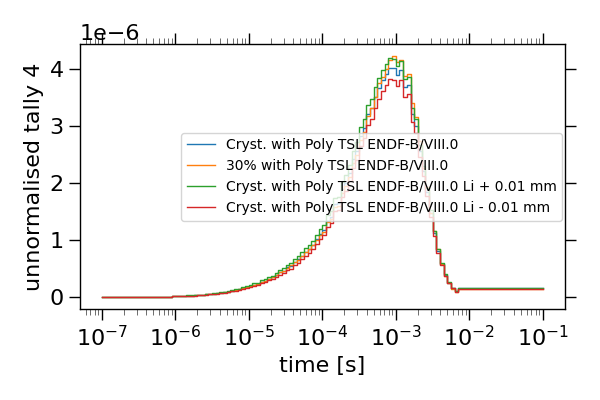

In [230]:
def extract_tally4_time(mctal_path: str):
    """Return (time_bins, values, errors) for tally 4."""
    m   = Mctal(mctal_path)
    t4  = m.GetTally(4)
    tfc = MctalTally.TFC           # −1 collapses unwanted axes

    t_bins = np.asarray(t4.GetTBins(), dtype=float)*1e-8          # time edges in seconds (MCNP is in units of shakes)

    values = np.asarray(
        [t4.GetValue(tfc, tfc, tfc, tfc, tfc, tfc, tfc, i)   #                 f d u s m c e t
         for i in range(len(t_bins))],
        dtype=float
    )
    errors = np.asarray(
        [t4.GetError(tfc, tfc, tfc, tfc, tfc, tfc, tfc, i)
         for i in range(len(t_bins))],
        dtype=float
    )
    return t_bins, values, errors

def extract_tally104_time(mctal_path: str):
    """Return (time_bins, values, errors) for tally 4."""
    m   = Mctal(mctal_path)
    t4  = m.GetTally(104)
    tfc = MctalTally.TFC           # −1 collapses unwanted axes

    t_bins = np.asarray(t4.GetTBins(), dtype=float)*1e-8          # time edges in seconds (MCNP is in units of shakes)

    values = np.asarray(
        [t4.GetValue(tfc, tfc, tfc, tfc, tfc, tfc, tfc, i)   #                 f d u s m c e t
         for i in range(len(t_bins))],
        dtype=float
    )
    errors = np.asarray(
        [t4.GetError(tfc, tfc, tfc, tfc, tfc, tfc, tfc, i)
         for i in range(len(t_bins))],
        dtype=float
    )
    return t_bins, values*1.63827E-02, errors

include_li_error = 'yes'  ### 'yes' or 'no'

run_dirs = {

    ############# ENDF-B/VIII.0 runs #############

    ######## crystalline ENDF-B/VIII.0 runs 
    # "Cryst. ENDF-B/VIII.0": "ORELA_Crystalline_TSL_MCNP_endf8p0_1e10nps_NoPolyTSL/mctal",
    "Cryst. with Poly TSL ENDF-B/VIII.0": "ORELA_Crystalline_TSL_MCNP_endf8p0_1e10nps_PolyTSL/mctal",

    ######## Sd ENDF-B/VIII.0 runs
    # "Sd ENDF-B/VIII.0": "ORELA_Sd_TSL_MCNP_endf8p0_1e10nps_NoPolyTSL/mctal",
    # "Sd with Poly TSL ENDF-B/VIII.0": "ORELA_Sd_TSL_MCNP_endf8p0_1e10nps_PolyTSL/mctal",

    ######## 10P ENDF-B/VIII.0 runs
    # "10% ENDF-B/VIII.0": "ORELA_10p_TSL_MCNP_endf8p0_1e10nps_NoPolyTSL/mctal",
    # "10% with Poly TSL ENDF-B/VIII.0": "ORELA_10p_TSL_MCNP_endf8p0_1e10nps_PolyTSL/mctal",

    ####### 20P ENDF-B/VIII.0 runs
    # "20% ENDF-B/VIII.0": "ORELA_20p_TSL_MCNP_endf8p0_1e10nps_NoPolyTSL/mctal",
    # "20% with Poly TSL ENDF-B/VIII.0": "ORELA_20p_TSL_MCNP_endf8p0_1e10nps_PolyTSL/mctal",

    # ####### 30P ENDF-B/VIII.0 runs
    # "30% ENDF-B/VIII.0": "ORELA_30p_TSL_MCNP_endf8p0_1e10nps_NoPolyTSL/mctal",
    "30% with Poly TSL ENDF-B/VIII.0": "ORELA_30p_TSL_MCNP_endf8p0_1e10nps_PolyTSL/mctal",

     ######## Free gas ENDF-B/VIII.0 runs
    # "Free gas No Poly TSL ENDF-B/VIII.0": "ORELA_FreeGas_TSL_MCNP_endf8p0_1e10nps_NoPolyTSL/mctal",
    # "Free gas with Poly TSL ENDF-B/VIII.0": "ORELA_FreeGas_TSL_MCNP_endf8p0_1e10nps_PolyTSL/mctal",

    ######## crystalline ENDF-B/VIII.0 runs Li thickness variation
    "Cryst. with Poly TSL ENDF-B/VIII.0 Li + 0.01 mm": "ORELA_Crystalline_TSL_MCNP_endf8p0_1e10nps_PolyTSL_Li_thick_pos0p01mm/mctal",
    "Cryst. with Poly TSL ENDF-B/VIII.0 Li - 0.01 mm": "ORELA_Crystalline_TSL_MCNP_endf8p0_1e10nps_PolyTSL_Li_thick_neg0p01mm/mctal",

}

data = {}                                   # label → (t, y, err)

for label, path in run_dirs.items():
    if label=='Crystalline S(a,b) fm −1 8 −2 fn':
        data[label] = extract_tally104_time(path)
    else:
        data[label] = extract_tally4_time(path)
    print(f"✓ extracted {label} from {path}")


# ----------------------------------------------------------------------
# 3.  PLOT
# ----------------------------------------------------------------------
plt.figure(figsize=(6, 4))
for label, (t, y, _) in data.items():       # ignore errors here; use _ if unused
    plt.step(t, y, where="pre", label=label)

plt.xscale("log")
plt.xlabel("time [s]")
plt.ylabel("unnormalised tally 4")
plt.legend(loc=0, prop={'size': 10})
plt.tight_layout()
plt.show()


In [231]:
# --- per-run normalization factors ---
exp_slice = exp_data[norm_min:norm_max]
weights = None
try:
    # if you have experimental uncertainties, use inverse-variance weights
    weights = 1.0 / (exp_err[norm_min:norm_max] ** 2)
except NameError:
    pass

norms = {}
for run in run_dirs:
    sim_slice = data[run][1][norm_min:norm_max]
    with np.errstate(divide="ignore", invalid="ignore"):
        ratios = exp_slice / sim_slice
    mask = np.isfinite(ratios) & (sim_slice != 0)

    if not np.any(mask):
        norms[run] = np.nan
        print(f"⚠️ no valid bins for normalization of {run}")
    else:
        if weights is None:
            norms[run] = np.average(ratios[mask])
        else:
            norms[run] = np.average(ratios[mask], weights=weights[mask])

    print(f"→ norm[{run}] = {norms[run]:.6g}")

→ norm[Cryst. with Poly TSL ENDF-B/VIII.0] = 9.35571e+09
→ norm[30% with Poly TSL ENDF-B/VIII.0] = 9.38608e+09
→ norm[Cryst. with Poly TSL ENDF-B/VIII.0 Li + 0.01 mm] = 8.60468e+09
→ norm[Cryst. with Poly TSL ENDF-B/VIII.0 Li - 0.01 mm] = 1.02724e+10


In [232]:
if include_li_error=='yes':
    
    pert1 = 'Cryst. with Poly TSL ENDF-B/VIII.0 Li - 0.01 mm'
    pert2 = 'Cryst. with Poly TSL ENDF-B/VIII.0 Li + 0.01 mm'
    normalization_09 = np.average(exp_data[norm_min:norm_max]/data[pert1][1][norm_min:norm_max])
    normalization_11 = np.average(exp_data[norm_min:norm_max]/data[pert2][1][norm_min:norm_max])

    error = np.abs(0.5*(1-(normalization_11*data[pert2][1])/(normalization_09*data[pert1][1])))

    # Add 1% from the other uncertainties in the benchmark
    benchmark_error = np.sqrt(error**2+0.01**2)
    
elif include_li_error=='no':

    ###without Lithium thickness perturbation
    benchmark_error = np.sqrt(0.01**2)

/var/folders/f1/b9jq0z3d0m93jkqfnm8565880000gp/T/ipykernel_47856/925117471.py:8: RuntimeWarning: invalid value encountered in divide
  error = np.abs(0.5*(1-(normalization_11*data[pert2][1])/(normalization_09*data[pert1][1])))


In [233]:
# -------- helper: load digitized CSV and plot it ----------
def plot_digitized(csv_path, label, where="post", lw=1):
    d = np.loadtxt(csv_path, delimiter=",", skiprows=1)
    centers = d[:, 2]  # center_geom_s
    counts  = d[:, 3]  # counts_rounded
    plt.step(centers, counts, where=where, label=label, linewidth=lw)

# -------- digitized curves (EDIT PATHS AS NEEDED) ----------
digitized_files = {
    # # Digitized ENDF/B/VIII.0 crystalline TSL results from benchmark report
    # "digitized_benchmark_values_crystalline_hist_1e-5_to_1e-2.csv":
    #     "Digitized (Cryst.)",

    # # Digitized ENDF/B/VIII.0 10% porosity TSL results from benchmark report
    # "digitized_benchmark_values_10porosity_hist_1e-5_to_1e-2.csv":
    #     "Digitized (10% porosity)",

    # # Digitized ENDF/B/VIII.0 20% porosity TSL results from benchmark report
    # "digitized_benchmark_values_20porosity_hist_1e-5_to_1e-2.csv":
    #     "Digitized (20% porosity)",

    # # Digitized ENDF/B/VIII.0 30% porosity TSL results from benchmark report
    # "digitized_benchmark_values_30porosity_hist_1e-5_to_1e-2.csv":
    #     "Digitized (30% porosity)",

    # # Digitized ENDF/B/VIII.0 Free Gas results from benchmark report
    # "digitized_benchmark_values_FreeGas_hist_1e-5_to_1e-2.csv":
    #     "Digitized (Free Gas)",
}

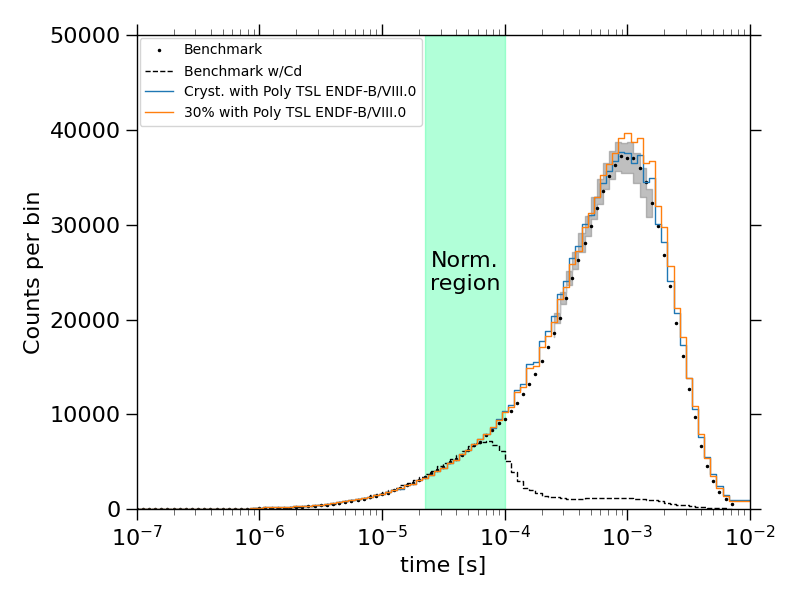

In [ ]:
plot_li_perturbations = False   # True -> show Li ±0.01mm curves, False -> hide them

li_pert_labels = {
    "Cryst. with Poly TSL ENDF-B/VIII.0 Li + 0.01 mm",
    "Cryst. with Poly TSL ENDF-B/VIII.0 Li - 0.01 mm",
}


plt.figure(figsize=(8, 6))

plt.step(exp_t, exp_data, 'k.', where='pre', label='Benchmark',linewidth=1)

if include_li_error=='yes':
    plt.fill_between(exp_t[data_min:data_max], exp_data[data_min:data_max]*(1-benchmark_error[data_min:data_max]), exp_data[data_min:data_max]*(1+benchmark_error[data_min:data_max]), color='gray', alpha=0.5, step='pre')

plt.step(exp_t, exp_data_cd, 'k--', where='pre', label='Benchmark w/Cd', linewidth=1)

# --- plot using each run’s own normalization ---
for run, _ in run_dirs.items():

    # keep your existing rule
    if "Perturbation" in run:
        continue

    # NEW: optionally hide the Li thickness perturbation runs
    if (not plot_li_perturbations) and (run in li_pert_labels):
        continue

    plt.step(
        data[run][0],
        norms[run] * data[run][1],
        where="mid",
        label=run,
        linewidth=1,
    )

# for path, lab in digitized_files.items():
#     plot_digitized(path, lab, where="post", lw=1)
    
plt.fill_between([exp_t[norm_min], exp_t[norm_max]], [0,0], [5e4, 5e4], color='springgreen', alpha=0.3, step='pre')
plt.text(np.exp(0.5*(np.log(exp_t[norm_min]) + np.log(exp_t[norm_max]))), 25e3, 'Norm.\nregion', ha='center', va='center')
plt.legend(loc=0, prop={'size': 10})
plt.xscale('log')
plt.xlabel('time [s]')
plt.ylabel('Counts per bin')
plt.ylim(0,5e4)
plt.xlim(1e-7,1e-2)
plt.tight_layout()
#plt.savefig('MCNP_Cryst_vs_30p_withPolyTSL_Li_error_included_comparison.png',dpi=600)
